## 가설들

1. 문제 푼 시간

    1. 지나치게 빨리 푼 문제들은 찍은 문제들 일 수도 있지 않을까?\
        : 쉬운 문제면 실제로 빨리 풀 수도 있지 않을까?

    2. 너무 오래걸린 문제들은 어려워서 못 푼거일 수도 있을텐데\
        : 푼 시간의 상승 추세 꺾이는 지점을 찾아봐야겠다

    3. 한 시험지 내에서 푼 시간의 순서, 기간\
        : 문항번호 추정
        : 피로도 고려

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import seaborn as sns

In [106]:
import pickle

with open('/data/ephemeral/home/level2-dkt-recsys-06/code/dkt/graph_emb/graph_embed_01-17 18:35.pickle', 'rb') as file:
    dict_graph = pickle.load(file)

In [100]:
columns = ['assessmentItemID','answerCode']

train['code'] = train['answerCode']

train['answerCode'][:3] = 2

train.loc[:3,['answerCode','code']]

/tmp/ipykernel_169000/588480157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['answerCode'][:3] = 2


,answerCode,code
0,2,1
1,2,1
2,2,1
3,1,1


In [117]:
train.shape, total.shape, test.shape

((2266586, 7), (2526700, 6), (260114, 6))

In [2]:
df = pd.read_csv('../data/FE_v2.0.csv')

In [3]:
df.AnswerCode.value_counts()

AnswerCode
1    1653588
0     872368
Name: count, dtype: int64

In [4]:
train = pd.read_csv('../data/train_data.csv')

In [5]:
train.answerCode.value_counts()

answerCode
1    1483205
0     783381
Name: count, dtype: int64

In [49]:
test.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag', 'SolvingTime', 'CumulativeTime', 'problems_cumulative',
       'problems_last7days', 'problems_last30days', 'Month', 'DayOfWeek',
       'TimeOfDay', 'CorrectnessRate', 'TagAccuracy',
       'UserCumulativeAnswerRate', 'categorize_solvingTime',
       'categorize_CorrectnessRate', 'categorize_TagAccuracy'],
      dtype='object')

In [39]:
fe = pd.read_csv('../data/FE_v2.0.csv')

In [23]:
test.columns = ['UserID', 'ProblemID', 'TestID', 'AnswerCode', 'Timestamp', 'KnowledgeTag']

In [24]:
test.head()

,UserID,ProblemID,TestID,AnswerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623


In [13]:
train.testId.astype('category').dtypes == 'UInt32'

False

In [75]:
train['KnowledgeTag'].nunique(), total.KnowledgeTag.nunique()

(912, 912)

In [4]:
total = pd.concat([train, test])

total.assessmentItemID.nunique(), total.KnowledgeTag.nunique()

(9454, 912)

In [10]:
total.drop_duplicates(subset=['userID','assessmentItemID'], keep='last').answerCode.value_counts()[:2].sum()

2475962

In [6]:
import torch
import torch.nn as nn

state = torch.load('/data/ephemeral/home/level2-dkt-recsys-06/code/lightgcn/models/best_model.pt', torch.device('cpu'))['model']

In [18]:
state['embedding.weight'].shape[0] - 7442

9454

In [19]:
emb = nn.Embedding(9454,256)
emb.load_state_dict({'weight':state['embedding.weight'][7442:]})
emb.weight.requires_grad = False

In [30]:
question = sorted(list(set(total.assessmentItemID)))

le = LabelEncoder()
le.fit(question)

result = le.transform(total.assessmentItemID)#.astype(str))


In [46]:
dir(le)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'classes_',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'inverse_transform',
 'set_output',
 'set_params',
 'transform']

In [70]:
le.inverse_transform([9453])

array(['A090074006'], dtype='<U10')

In [72]:
t = torch.LongTensor([[[3,4],[2,3]],[[2,1],[2,3]]])-1+1
t

tensor([[[3, 4],
         [2, 3]],

        [[2, 1],
         [2, 3]]])

In [38]:
state['embedding.weight'][7442:]

tensor([[ 0.0041, -0.0104,  0.0083,  ...,  0.0230,  0.0019,  0.0065],
        [ 0.0100, -0.0157, -0.0005,  ...,  0.0165, -0.0030,  0.0243],
        [ 0.0121,  0.0191,  0.0219,  ..., -0.0032, -0.0104,  0.0236],
        ...,
        [ 0.0129, -0.0099, -0.0168,  ..., -0.0039,  0.0157,  0.0034],
        [ 0.0063,  0.0004,  0.0125,  ...,  0.0132, -0.0153,  0.0007],
        [-0.0147,  0.0065, -0.0004,  ..., -0.0104, -0.0205,  0.0067]])

In [15]:
class shit(nn.Module):
    def __init__(self,state):
        super.__init__()


    def forward(self,data):
        out = self.emb(data)

        return out


<All keys matched successfully>

In [13]:
total.assessmentItemID.nunique(), train.assessmentItemID.nunique(), total.userID.nunique()

(9454, 9454, 7442)

In [55]:
train.KnowledgeTag.nunique()

912

In [4]:
a = sorted(list(set(train.assessmentItemID)))

e = train.assessmentItemID.astype(str)

le = LabelEncoder()
le.fit(a)
x = torch.LongTensor(le.transform(e))

In [7]:
f = state['model']['embedding.weight'][7442:]
f.shape

torch.Size([9454, 64])

In [8]:
d = torch.LongTensor([0]).to('cuda')
a = nn.Embedding.from_pretrained(f)(d), f[0]

In [17]:
nn.Embedding.from_pretrained(f)

AttributeError: 'Embedding' object has no attribute 'requires_grad'

In [18]:
a[0].requires_grad

False

In [ ]:
b = torch.LongTensor([[5,3],[3,4],[1,3]]).to('cuda')

a = nn.Embedding.from_pretrained(state['model']['embedding.weight'].detach().cpu()).to('cuda')(b)
a

In [1]:
s = 'A0101'
type(s) == str

True

In [85]:
total.groupby(['userID','assessmentItemID']).testId.count().shape, total.userID.nunique(), total.assessmentItemID.nunique()

((2476706,), 7442, 9454)

In [8]:
n_nodes = total.userID.nunique() + total.assessmentItemID.nunique()

In [9]:
import torch_geometric
# from torch_geometric.nn.models import LightGCN
from lightgcn.lightgcn.lightgcn_source import LightGCN
import torch

model = LightGCN(n_nodes,64,2)

In [23]:
a = model._parameters
a

OrderedDict([('alpha',
              Parameter containing:
              tensor([0.3333, 0.3333, 0.3333], requires_grad=True))])

In [27]:
n_user = total.userID.nunique()
state['model']['embedding.weight'].shape, n_nodes

(torch.Size([16896, 64]), 16896)

In [51]:
state['model']['embedding.weight'][n_user:].shape, total['assessmentItemID'].nunique(), n_user

(torch.Size([9454, 64]), 9454, 7442)

In [49]:
state['model']['embedding.weight'][3].shape

torch.Size([64])

In [70]:
train.userID.nunique() , test.userID.nunique() , train.assessmentItemID.nunique()

(7442, 744, 13)

In [45]:
train.assessmentItemID.unique().tolist()[:5], sorted(list(set(train.assessmentItemID))[:5])

(['A060001001', 'A060001002', 'A060001003', 'A060001004', 'A060001005'],
 ['A040113001', 'A040180001', 'A050155001', 'A070041001', 'A070153004'])

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit_transform(sorted(list(set(train.assessmentItemID))[:5]))


array([0, 1, 2, 3, 4])

In [53]:
b = np.array([1,2,3,4,5])

c = np.random.permutation(b)[:3]

(array([1, 2, 3, 4, 5]), array([2, 1, 4]))

In [51]:
train.assessmentItemID.value_counts()

assessmentItemID
1     414349
3     414244
2     413496
4     412018
5     401627
6     220402
7     141866
8      74576
9      20592
10      5940
11      3748
12      2799
13       299
Name: count, dtype: int64

In [31]:
test.assessmentItemID, train.userID

(0         A050023001
 1         A050023002
 2         A050023003
 3         A050023004
 4         A050023006
              ...    
 260109    A040130001
 260110    A040130002
 260111    A040130003
 260112    A040130004
 260113    A040130005
 Name: assessmentItemID, Length: 260114, dtype: object,
 0             0
 1             0
 2             0
 3             0
 4             0
            ... 
 2525951    7441
 2525952    7441
 2525953    7441
 2525954    7441
 2525955    7441
 Name: userID, Length: 2525956, dtype: int64)

In [38]:
user2idx = {str(v):i for i,v in enumerate(train.userID)}
item2idx = {str(v):i+len(user2idx) for i,v in enumerate(train.assessmentItemID)}

In [44]:
train.assessmentItemID.nunique()

13

In [34]:
total = dict(user2idx, **item2idx)
len(total), len(user2idx), len(item2idx)

(7442, 7442, 13)

In [47]:
columns = ['testId','assessmentItemID']

train.groupby('userID').apply(lambda r: (r['testId'].values, r['assessmentItemID'].values)).values[-1]

(array(['A030000071', 'A030000071', 'A030000071', 'A030000071',
        'A030000071', 'A040000165', 'A040000165', 'A040000165',
        'A040000165'], dtype=object),
 array(['A030071001', 'A030071002', 'A030071003', 'A030071004',
        'A030071005', 'A040165001', 'A040165002', 'A040165003',
        'A040165004'], dtype=object))

In [41]:
columns = ['testId','assessmentItemID']

train.groupby('userID').apply(lambda r: tuple([r[col].values for col in columns])).values[-1]

(array(['A030000071', 'A030000071', 'A030000071', 'A030000071',
        'A030000071', 'A040000165', 'A040000165', 'A040000165',
        'A040000165'], dtype=object),
 array(['A030071001', 'A030071002', 'A030071003', 'A030071004',
        'A030071005', 'A040165001', 'A040165002', 'A040165003',
        'A040165004'], dtype=object))

In [8]:
print(test.shape)
test.sample(10)

(260114, 6)


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
85174,1071,A020040005,A020000040,1,2020-07-17 09:19:36,7925
205325,3241,A060046001,A060000046,1,2020-02-07 09:52:26,599
62893,772,A020057003,A020000057,1,2020-07-21 12:15:50,7926
62194,767,A030091002,A030000091,0,2020-06-17 07:35:57,452
53538,645,A060174004,A060000174,0,2020-08-14 03:01:52,10450
204431,3155,A010071003,A010000071,1,2020-06-18 05:11:07,6455
190440,2757,A050179001,A050000179,1,2020-09-01 02:29:14,10396
160059,2169,A080053002,A080000053,0,2020-05-22 06:16:12,4962
117121,1571,A020155006,A020000155,0,2020-10-19 03:52:36,8126
197185,2973,A010169001,A010000169,1,2020-09-08 02:46:17,7809


In [6]:
train.testId.nunique(), train.assessmentItemID.nunique()

(1537, 9454)

In [16]:
train.groupby(['testId','userID'])['assessmentItemID'].count().value_counts()

assessmentItemID
5     154004
6      69198
7      56625
8      46891
4      12277
9      12164
10      4771
12      3638
3       1580
16      1117
14      1116
11       828
13       259
2        259
18       231
24        92
20        43
21        31
22        20
15        13
26         5
27         2
Name: count, dtype: int64

In [15]:
test.groupby(['testId','userID'])['assessmentItemID'].count().value_counts()

assessmentItemID
5     17613
6      7838
7      6934
8      5303
9      1476
4      1403
10      509
12      392
3       196
14      108
16       82
11       80
13       31
2        29
18       19
24        8
20        3
22        1
Name: count, dtype: int64

## 결측치

- 단 한 개도 없음
- 이상한 값 있는 지도 찾아볼게요

In [12]:
train.isna().sum()

userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
dtype: int64

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260114 entries, 0 to 260113
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   userID            260114 non-null  int64 
 1   assessmentItemID  260114 non-null  object
 2   testId            260114 non-null  object
 3   answerCode        260114 non-null  int64 
 4   Timestamp         260114 non-null  object
 5   KnowledgeTag      260114 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 11.9+ MB


In [14]:
train.describe()

,userID,answerCode,KnowledgeTag
count,2.266586e+06,2.266586e+06,2.266586e+06
mean,2.087687e+03,6.543784e-01,4.909007e+03
std,1.589365e+03,4.755706e-01,3.302214e+03
min,0.000000e+00,0.000000e+00,2.300000e+01
25%,8.000000e+02,0.000000e+00,1.931000e+03
50%,1.748000e+03,1.000000e+00,5.258000e+03
75%,3.046000e+03,1.000000e+00,7.913000e+03
max,7.441000e+03,1.000000e+00,1.127100e+04


## 유저들 목록

유저들 아무도 안겹쳐!

user_ID 일치여부만 중요하고, 누가 누군지는 생각보다 안 중요할 수도?

그렇다면, 유저를 나타낼 수 있는건 뭐가 있을까?
userID, assessmentItemID, testId, answerCode, Timestamp, KnoledgeTag

근데, 이거 lstm 계열에서는 어떻게 처리했지?

In [24]:
train.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag'],
      dtype='object')

In [15]:
train.userID.nunique(), train.answerCode.nunique(), train.KnowledgeTag.nunique()

(6698, 2, 912)

In [16]:
test.userID.nunique(), test.answerCode.nunique(), test.KnowledgeTag.nunique()

(744, 3, 912)

In [18]:
users_test = list(test.userID.unique())
users_train = list(train.userID.unique())

count = 0

for user in users_train:
    if user in users_test:
        count += 1

print(count / len(users_train))

0.0


In [7]:
train.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag'],
      dtype='object')

In [24]:
a = train.groupby('userID').apply(lambda r: (r['testId'].values, r['assessmentItemID'].values)).values

a.shape, len(a[0][0])

# userID당 2개의 튜플로 이루어진 tuple (testID...., assesmenItemID.....)

((6698,), 745)

In [21]:
test.answerCode.value_counts()

answerCode
 1    170383
 0     88987
-1       744
Name: count, dtype: int64

In [29]:
test.groupby('userID')['answerCode'].agg({'count'}).sort_values(by='count')

,count
userID,
7417,15
7416,15
7404,15
7373,15
7033,15
...,...
203,1318
617,1333
260,1335


In [30]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'])

train.groupby('userID')['Timestamp'].max()

userID
0      2020-12-23 03:40:19
1      2020-11-13 02:47:20
2      2020-10-20 11:32:26
5      2020-12-11 22:48:28
6      2020-10-26 09:52:14
               ...        
7436   2020-04-08 12:07:21
7437   2020-05-22 01:53:49
7438   2020-10-19 10:28:29
7440   2020-10-21 08:33:20
7441   2020-08-21 01:08:49
Name: Timestamp, Length: 6698, dtype: datetime64[ns]

In [32]:
from datetime import timedelta

train.groupby('userID')['Timestamp'].max() - timedelta(7)

userID
0      2020-12-16 03:40:19
1      2020-11-06 02:47:20
2      2020-10-13 11:32:26
5      2020-12-04 22:48:28
6      2020-10-19 09:52:14
               ...        
7436   2020-04-01 12:07:21
7437   2020-05-15 01:53:49
7438   2020-10-12 10:28:29
7440   2020-10-14 08:33:20
7441   2020-08-14 01:08:49
Name: Timestamp, Length: 6698, dtype: datetime64[ns]

In [33]:
train.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,hour
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,0


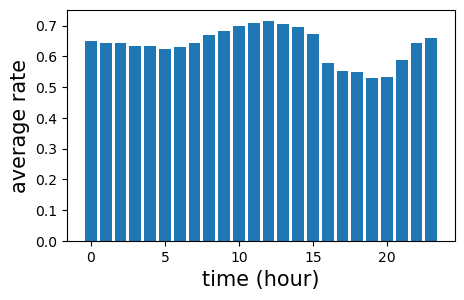

In [38]:
train['hour'] = train['Timestamp'].dt.hour

a = train.groupby('hour').answerCode.mean()

plt.figure(figsize=(5,3))
plt.bar(a.index, a.values)

plt.xlabel('time (hour)', fontsize=15)
plt.ylabel('average rate', fontsize=15)

plt.show()

ValueError: setting an array element with a sequence.

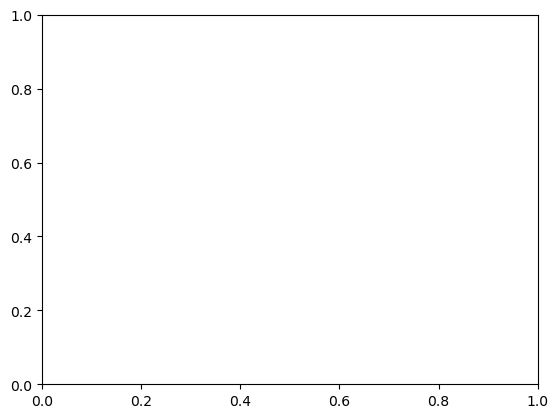

In [40]:
plt.plot(train.groupby('userID').answerCode.rolling(10).mean())
plt.show()

In [41]:
train.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag', 'hour'],
      dtype='object')

In [44]:
testids_train = list(train.testId.unique())
testids_test = list(test.testId.unique())

count=0
for id in testids_test:
    if id in testids_train:
        count += 1

print(count)

1537


In [50]:
train.userID.nunique(), train.testId.nunique(), test.testId.nunique(), train.assessmentItemID.nunique()

(6698, 1537, 1537, 9454)

In [54]:
train.groupby(['userID','testId']).assessmentItemID.nunique()

userID  testId    
0       A020000172    6
        A020000174    5
        A020000181    6
        A020000182    5
        A020000183    7
                     ..
7440    A030000136    5
        A030000197    5
        A050000096    5
7441    A030000071    5
        A040000165    4
Name: assessmentItemID, Length: 365164, dtype: int64

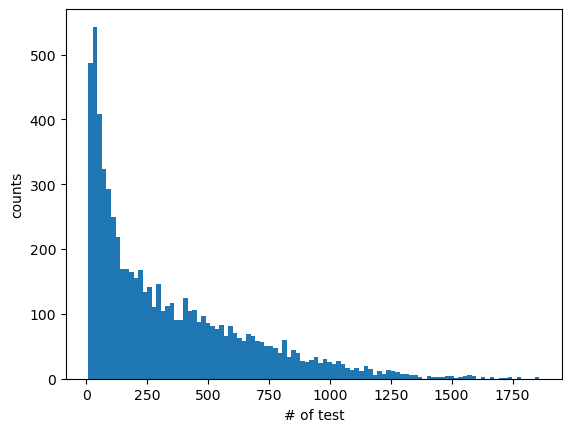

In [80]:
b = train.groupby('userID')['assessmentItemID'].count()

plt.hist(b, bins=100)

plt.xlabel('# of test')
plt.ylabel('counts')

plt.show()

In [5]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'])

/tmp/ipykernel_402661/4264669576.py:3: FutureWarning: The 'axis' keyword in SeriesGroupBy.diff is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  plt.hist(np.log(train.groupby(['userID','testId']).Timestamp.diff(axis=0).dt.seconds+1), bins=100)


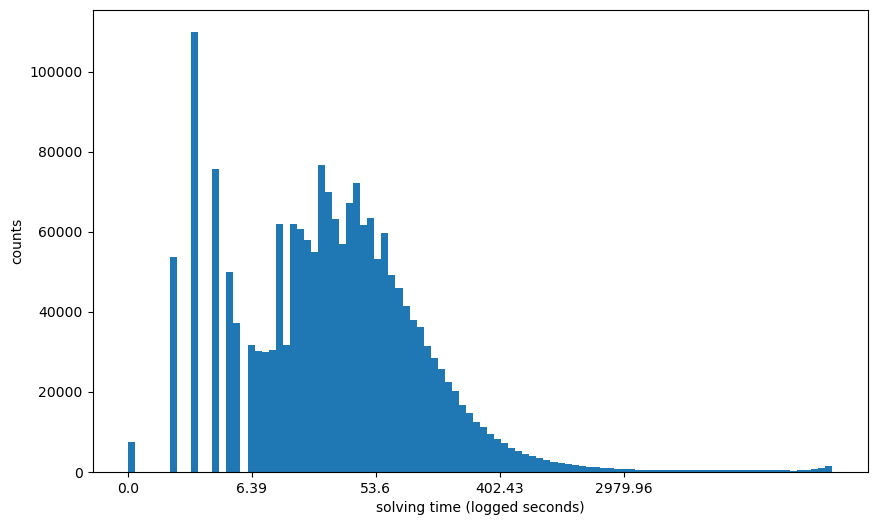

In [28]:
plt.figure(figsize=(10,6))

plt.hist(np.log(train.groupby(['userID','testId']).Timestamp.diff(axis=0).dt.seconds+1), bins=100)

plt.xticks([0,2,4,6,8],np.round(np.exp([0,2,4,6,8])-1,2))

plt.xlabel('solving time (logged seconds)')
plt.ylabel('counts')

plt.show()

In [9]:
train.loc[0,'Timestamp'] - train.loc[1, 'Timestamp']

Timedelta('-1 days +23:59:57')

In [7]:
train.loc[0,'Timestamp'] - train.loc[1, 'Timestamp']

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [33]:
train.groupby(['userID','testId']).apply(lambda x: x.Timestamp.values[:2])

userID  testId    
0       A020000172    [2020-10-11T11:06:47.000000000, 2020-10-11T11:...
        A020000174    [2020-10-17T10:56:12.000000000, 2020-10-17T10:...
        A020000181    [2020-10-18T09:33:27.000000000, 2020-10-18T09:...
        A020000182    [2020-10-21T10:11:49.000000000, 2020-10-21T10:...
        A020000183    [2020-10-22T09:19:40.000000000, 2020-10-22T09:...
                                            ...                        
7440    A030000136    [2020-09-23T09:19:35.000000000, 2020-09-23T09:...
        A030000197    [2020-10-21T08:31:45.000000000, 2020-10-21T08:...
        A050000096    [2020-08-19T04:57:19.000000000, 2020-08-19T04:...
7441    A030000071    [2020-06-05T06:46:41.000000000, 2020-06-05T06:...
        A040000165    [2020-08-21T01:06:39.000000000, 2020-08-21T01:...
Length: 365164, dtype: object

In [30]:
a = []

for b in a:
    print(1)

In [31]:
list(set(["userID","assessmentItemID", "testId", "answerCode", "KnowledgeTag"]))

['assessmentItemID', 'testId', 'userID', 'KnowledgeTag', 'answerCode']

In [59]:
import torch
a = ["userID","assessmentItemID", "testId", "answerCode", "KnowledgeTag"]
a.extend(['a','a','b'])

b = 

['userID', 'assessmentItemID', 'testId', 'answerCode', 'KnowledgeTag', 'a', 'a', 'b']


In [87]:
a = torch.tensor([1,2,3], dtype=torch.int16)
b =  torch.tensor([1,2,3], dtype=torch.float32)
c = torch.tensor([1,2,3], dtype=torch.int)
d = torch.tensor([1,2,3], dtype=torch.int64)

torch.concat([a,b,c,d])

tensor([1., 2., 3., 1., 2., 3., 1., 2., 3., 1., 2., 3.])

In [73]:
b = pd.DataFrame()

for i in range(3):
    b[f'a{i}'] = [1,2,3]

In [79]:
c = []

for i in enumerate(c):
    print(1)

In [98]:
e = torch.LongTensor([1,2,3,4,5]*3)
print(e.dtype)

torch.int64


In [103]:
tmp = torch.zeros(20, dtype=torch.int16)
tmp[20-15:] = e
tmp

tensor([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
       dtype=torch.int16)

In [104]:
new = ()

for i, contents in enumerate(new):
    print(i, contents)

In [126]:
new = (1,2,3)
vs = new[3:]

q = torch.tensor([1]*3)
q.dtype,torch.LongTensor(q)

(torch.int64, tensor([1, 1, 1]))

In [116]:
torch.__version__

# 1.12.1 11.4

'1.12.1'

In [121]:
train.groupby('userID').assessmentItemID.count().min()

9

In [ ]:
test, question, question, interaction

출력요구: interaction, test, question, tag
나온거: test , question, userID, interaction

columns:['userID', 'assessmentItemID', 'testId', 'answerCode', 'KnowledgeTag']
